### 2. **Gráficos para Visualización de Datos**
**Resumen:** La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

1. **Gráfico de Violín de Volumen de Ventas por Región:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])


from statsmodels.tsa.seasonal import seasonal_decompose


# Para seleccionar unicamente las regiones propias , descartamos Total US para la vista gráfica
#df_cp_cleaned=df_cp[df_cp.region != 'TotalUS']
#df_cp_CA=df_cp[df_cp.region == 'California']
#df_cp_noCA=df_cp[(df_cp.region != 'TotalUS') & (df_cp.region != "California")]
#df_cp_noCA_conventional=df_cp[(df_cp.region != 'TotalUS') & (df_cp.region != "California") & (df_cp.type=='conventional')]
#df_cp_noCA_organic=df_cp[(df_cp.region != 'TotalUS') & (df_cp.region != "California") & (df_cp.type=='organic')]
#df_cp_organic=df_cp[(df_cp.region != 'TotalUS') & (df_cp.type=='organic')]
#df_cp_conventional=df_cp[(df_cp.region != 'TotalUS') & (df_cp.type=='conventional')]
#df_cp_Denver=df_cp[df_cp.region == 'Denver']

region_classification = {
        'Albany': 'City',
        'Atlanta': 'City',
        'BaltimoreWashington': 'Region',
        'Boise': 'City',
        'Boston': 'City',
        'BuffaloRochester': 'Region',
        'California': 'GreaterRegion',
        'Charlotte': 'City',
        'Chicago': 'City',
        'CincinnatiDayton': 'Region',
        'Columbus': 'City',
        'DallasFtWorth': 'Region',
        'Denver': 'City',
        'Detroit': 'City',
        'GrandRapids': 'City',
        'GreatLakes': 'GreaterRegion',
        'HarrisburgScranton': 'Region',
        'HartfordSpringfield': 'Region',
        'Houston': 'City',
        'Indianapolis': 'City',
        'Jacksonville': 'City',
        'LasVegas': 'City',
        'LosAngeles': 'City',
        'Louisville': 'City',
        'MiamiFtLauderdale': 'Region',
        'Midsouth': 'GreaterRegion',
        'Nashville': 'City',
        'NewOrleansMobile': 'Region',
        'NewYork': 'City',
        'Northeast': 'GreaterRegion',
        'NorthernNewEngland': 'Region',
        'Orlando': 'City',
        'Philadelphia': 'City',
        'PhoenixTucson': 'Region',
        'Pittsburgh': 'City',
        'Plains': 'GreaterRegion',
        'Portland': 'City',
        'RaleighGreensboro': 'Region',
        'RichmondNorfolk': 'Region',
        'Roanoke': 'City',
        'Sacramento': 'City',
        'SanDiego': 'City',
        'SanFrancisco': 'City',
        'Seattle': 'City',
        'SouthCarolina': 'Region',
        'SouthCentral': 'GreaterRegion',
        'Southeast': 'GreaterRegion',
        'Spokane': 'City',
        'StLouis': 'City',
        'Syracuse': 'City',
        'Tampa': 'City',
        'TotalUS': 'TotalUS',
        'West': 'GreaterRegion',
        'WestTexNewMexico': 'Region'
}
df_cp['RegionClass'] = df_cp['region'].map(region_classification)
df_cp_cleaned=df_cp[df_cp.region != 'TotalUS']
df_cp_GreaterRegion=df_cp_cleaned[df_cp_cleaned['RegionClass']=='GreaterRegion']
df_cp_TotalUS=df_cp[df_cp['region']=='TotalUS']
df_cp_GreaterRegion_conv=df_cp_GreaterRegion[df_cp_GreaterRegion['type']=='conventional']
df_cp_GreaterRegion_org=df_cp_GreaterRegion[df_cp_GreaterRegion['type']=='organic']

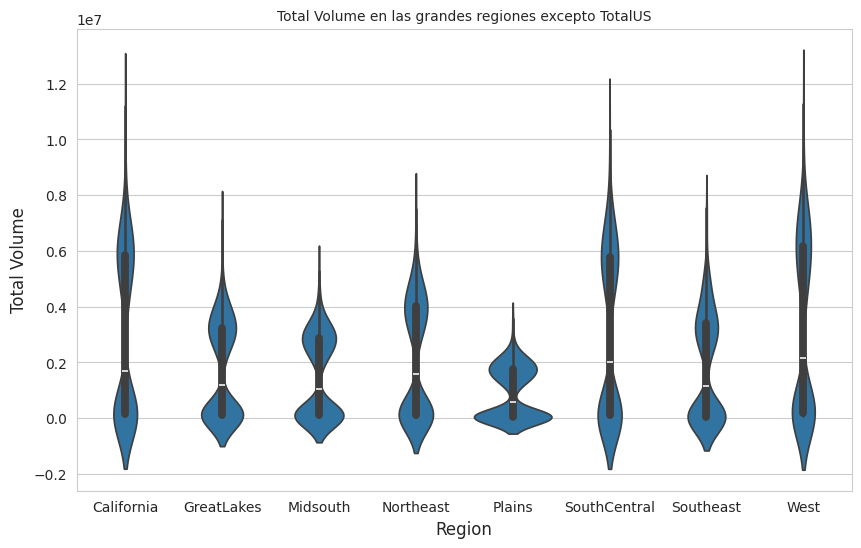

In [2]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.violinplot(x='region',y='Total Volume', data=df_cp_GreaterRegion)
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Total Volume',{'fontsize':'large'})
plt.title("Total Volume en las grandes regiones excepto TotalUS",{'fontsize':10})
plt.show()

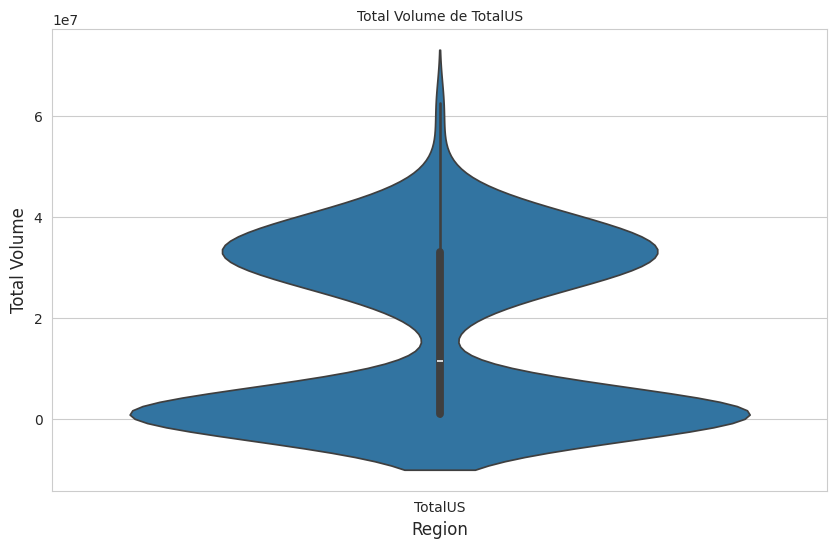

In [3]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.violinplot(x='region',y='Total Volume', data=df_cp_TotalUS)
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Total Volume',{'fontsize':'large'})

plt.title("Total Volume de TotalUS",{'fontsize':10})

plt.show()

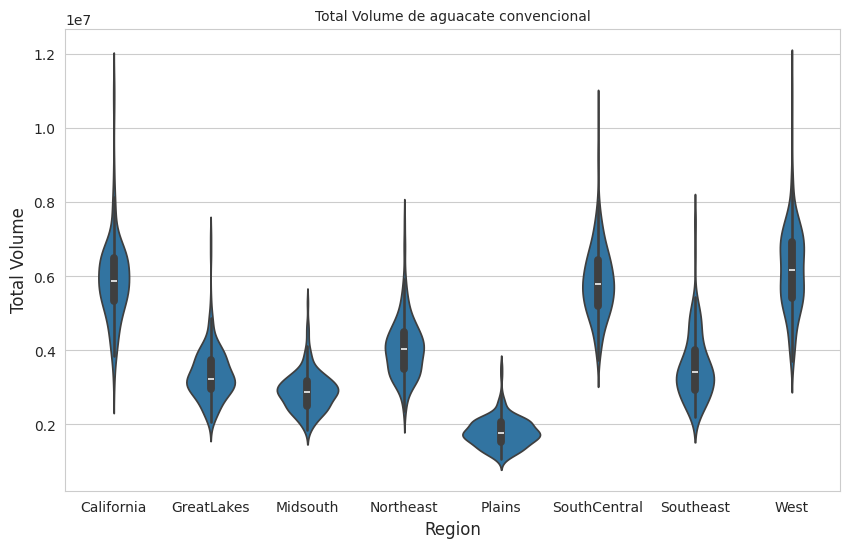

In [4]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.violinplot(x='region',y='Total Volume', data=df_cp_GreaterRegion_conv)
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Total Volume',{'fontsize':'large'})

plt.title("Total Volume de aguacate convencional",{'fontsize':10})

plt.show()

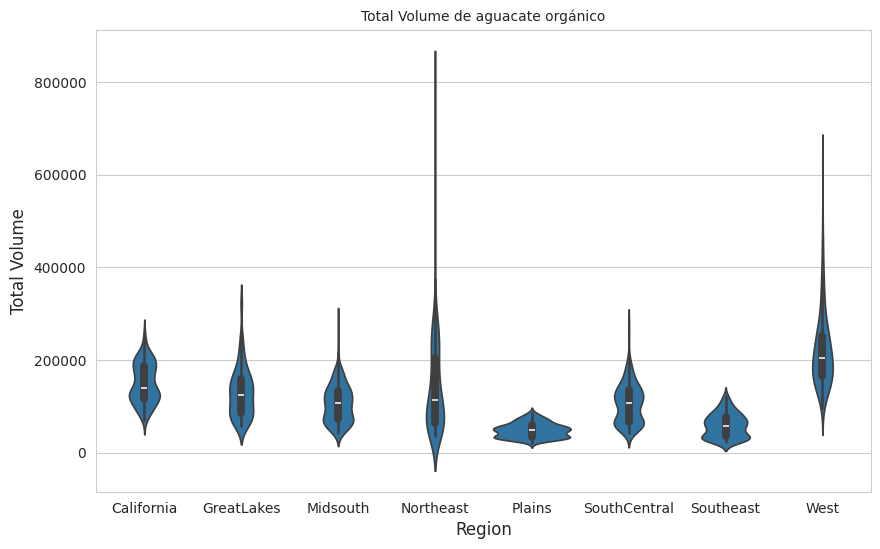

In [5]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.violinplot(x='region',y='Total Volume', data=df_cp_GreaterRegion_org)
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Total Volume',{'fontsize':'large'})
plt.title("Total Volume de aguacate orgánico",{'fontsize':10})

plt.show()

##### Exploramos qué regiones son las mayores contribuyentes al Total Volume de Ventas

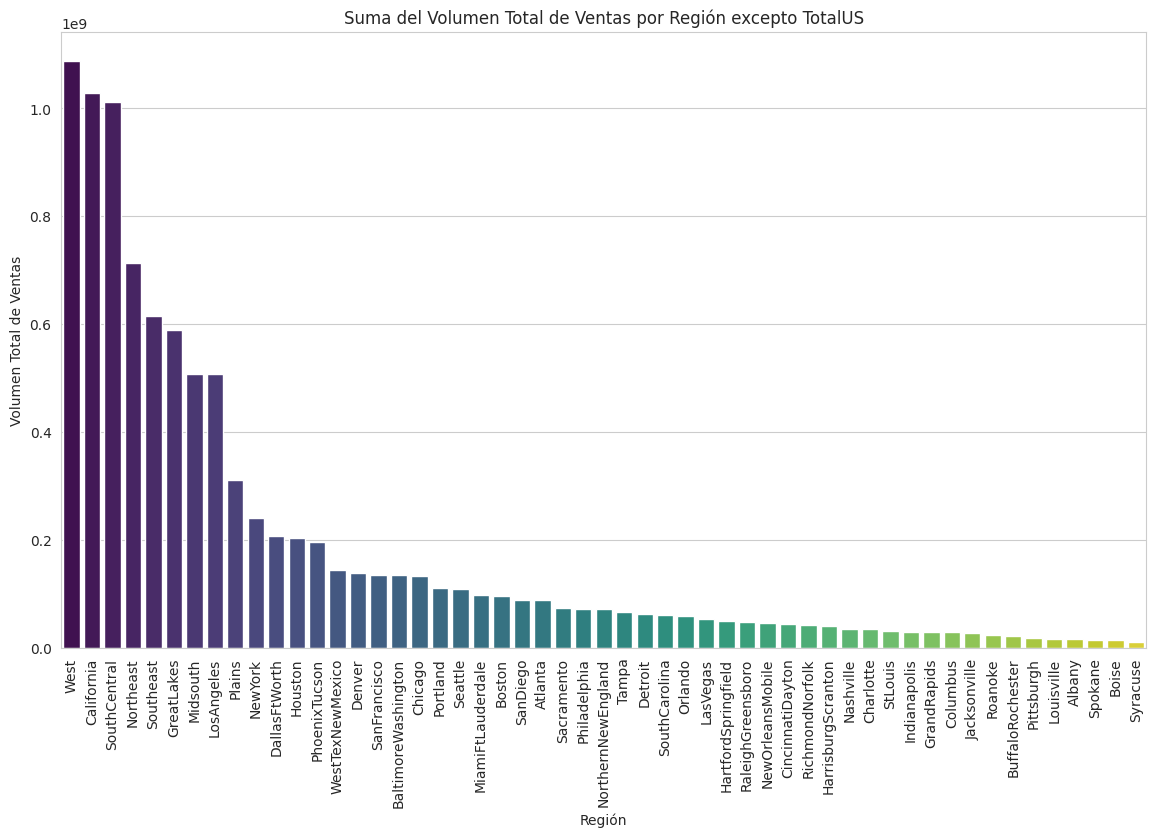

In [6]:

volume_by_region = df_cp_cleaned.groupby('region')['Total Volume'].sum().sort_values(ascending=False).to_frame()

plt.figure(figsize=(14, 8))

sns.barplot(data=volume_by_region, x='region', y='Total Volume', hue='region', palette='viridis')


plt.xticks(rotation=90)

# Añadir título y etiquetas a los ejes
plt.title('Suma del Volumen Total de Ventas por Región excepto TotalUS')
plt.xlabel('Región')
plt.ylabel('Volumen Total de Ventas')

# Mostrar el gráfico
plt.show()

2. **Boxplot Comparativo de Precios entre Años:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.

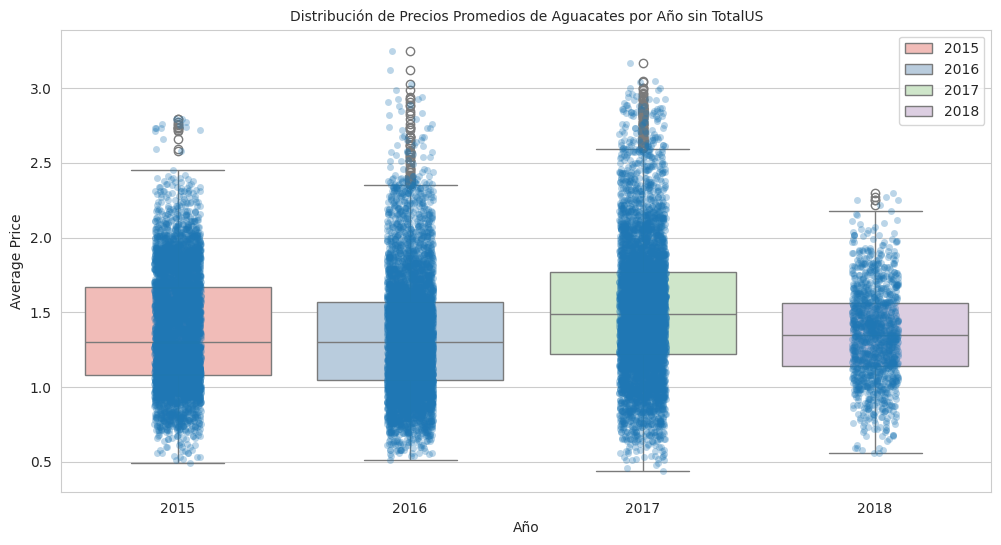

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

plt.figure(figsize=(12, 6))
plt.title('Distribución de Precios Promedios de Aguacates por Año sin TotalUS',{'fontsize':10})
plt.xlabel('Año')
plt.ylabel('Average Price')
sns.boxplot(data=df_cp_cleaned, x='year', y='AveragePrice', hue='year', palette='Pastel1')
sns.stripplot(data=df_cp_cleaned, x='year', y='AveragePrice',alpha=0.3)
plt.show()

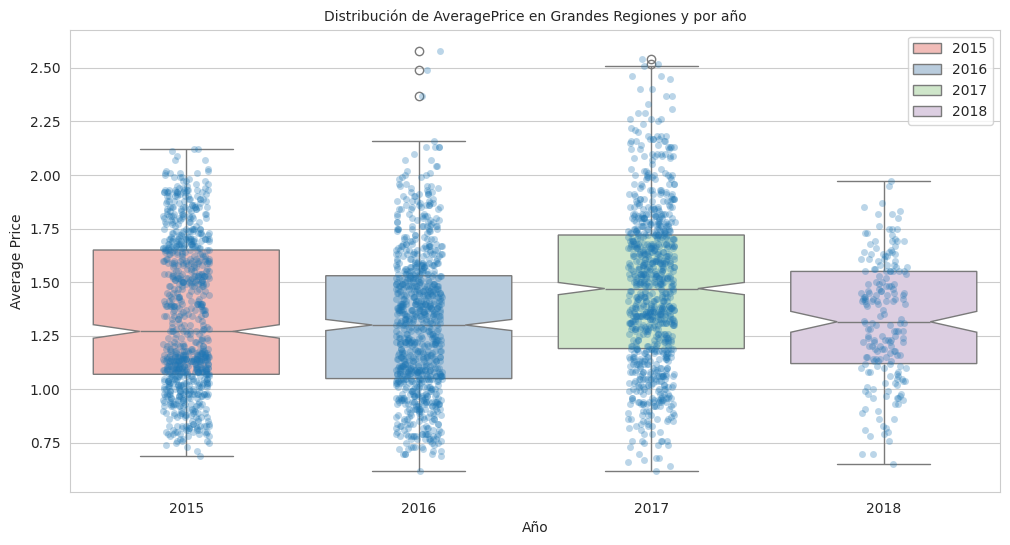

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

plt.figure(figsize=(12, 6))
plt.title('Distribución de AveragePrice en Grandes Regiones y por año',{'fontsize':10})
plt.xlabel('Año')
plt.ylabel('Average Price')
sns.boxplot(data=df_cp_GreaterRegion, x='year', y='AveragePrice', hue='year', palette='Pastel1', notch=True)
sns.stripplot(data=df_cp_GreaterRegion, x='year', y='AveragePrice',alpha=0.3)
plt.show()

##### Conclusiones: las ciudades y regiones al ser más pequeñas introducen más variabilidad en el precio

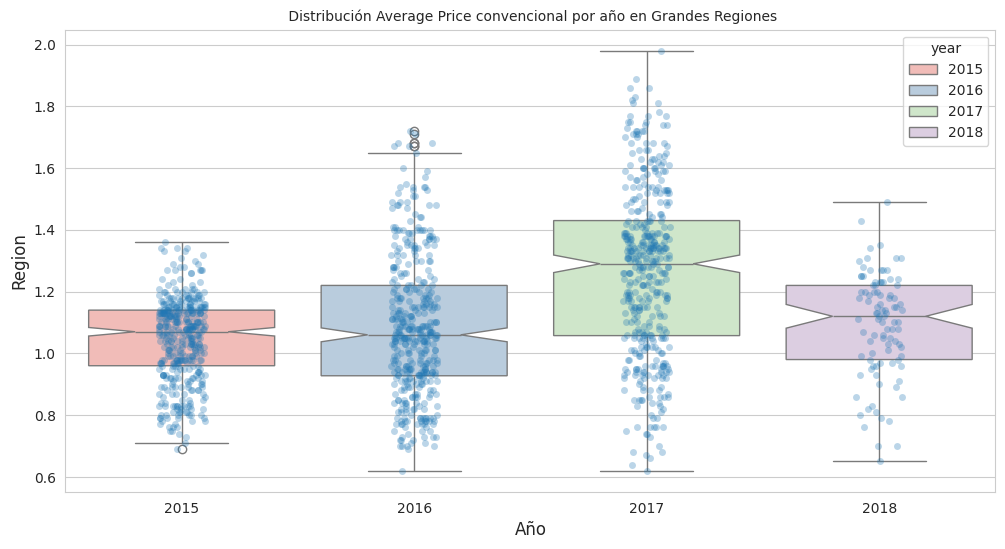

In [9]:
plt.figure(figsize=(12,6))

plt.xlabel('Año',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title(" Distribución Average Price convencional por año en Grandes Regiones",{'fontsize':10})
sns.stripplot(data=df_cp_GreaterRegion_conv, x='year', y='AveragePrice',alpha=0.3)
sns.boxplot(data=df_cp_GreaterRegion_conv, x='year', y='AveragePrice', hue='year', palette='Pastel1', notch=True)

plt.show()

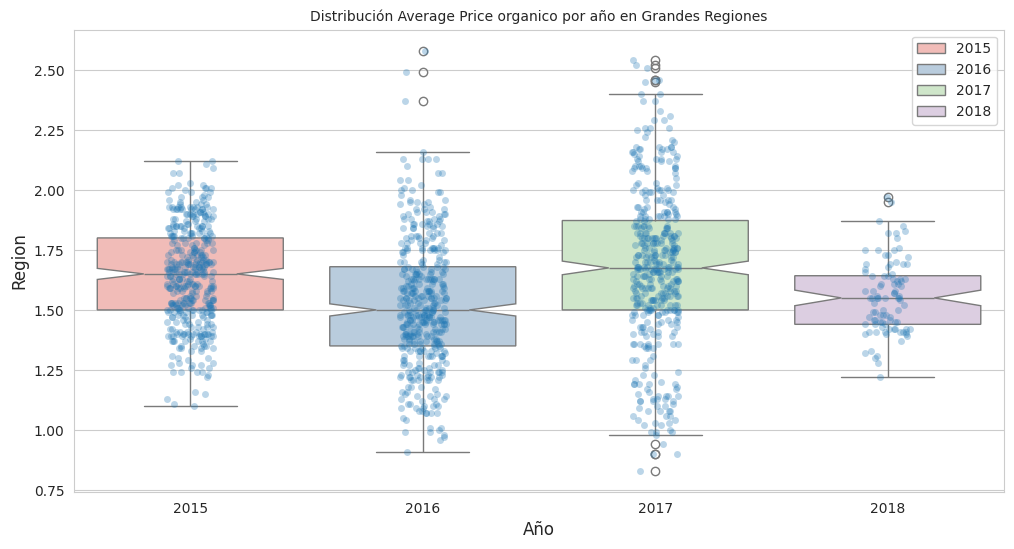

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cp_GreaterRegion_org, x='year', y='AveragePrice', hue='year', palette='Pastel1', notch=True)
plt.xlabel('Año',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Distribución Average Price organico por año en Grandes Regiones",{'fontsize':10})
sns.stripplot(data=df_cp_GreaterRegion_org, x='year', y='AveragePrice',alpha=0.3)
plt.show()

3. **Histograma de Volumen Total de Ventas:**
   - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.



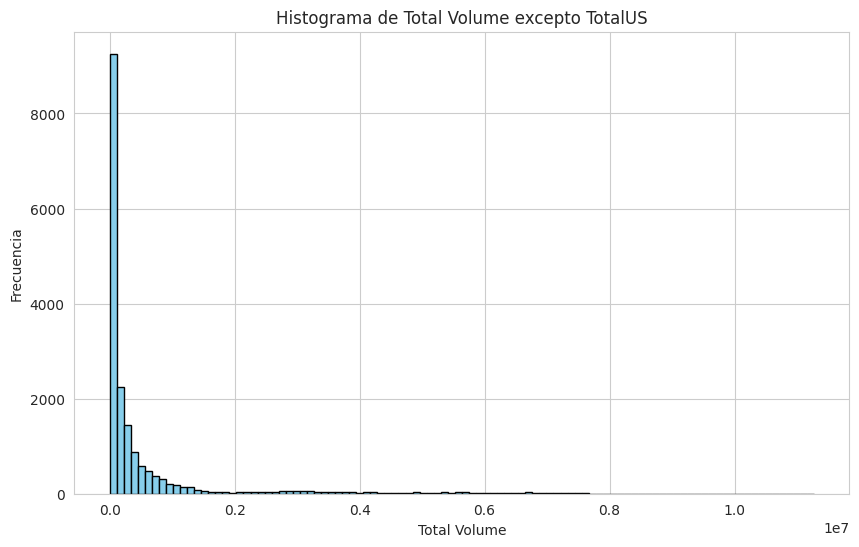

In [11]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el histograma para la columna 'Total Volume'
plt.hist(df_cp_cleaned['Total Volume'], bins=100, color='skyblue', edgecolor='black')

# Añadir título y etiquetas a los ejes
plt.title('Histograma de Total Volume excepto TotalUS')
plt.xlabel('Total Volume')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

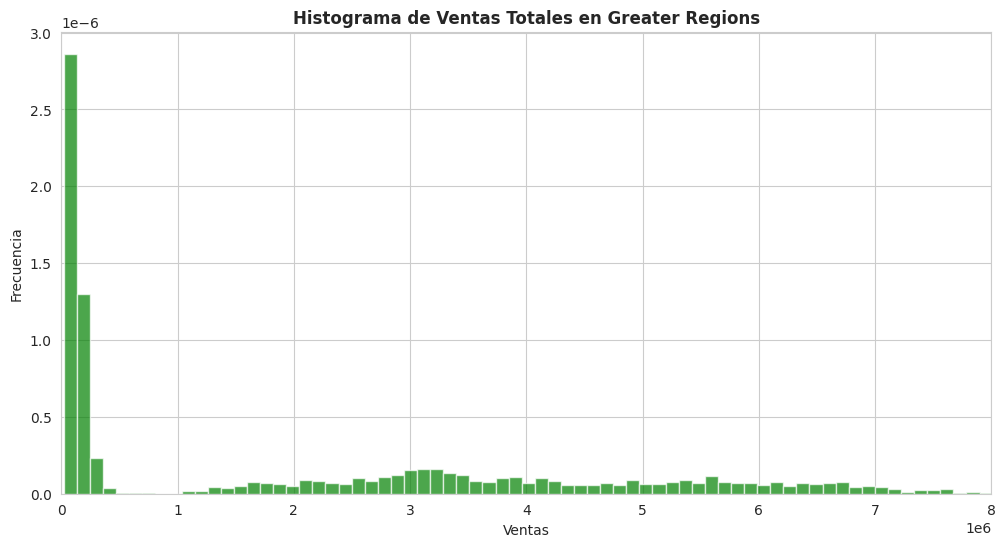

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
plt.figure(figsize=(12,6))
plt.xlim(0.0,0.8*10**7)
#plt.ylim(0.0,2*10**-6)
plt.title('Histograma de Ventas Totales en Greater Regions', fontweight = "bold")
plt.hist(df_cp_GreaterRegion['Total Volume'], bins= 100, density=0.5, color='green',alpha=0.7)
#plt.hist(df_cp_GreaterRegion_org['Total Volume'], bins= 100, density=0.5, color='green',alpha=0.7)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
# plt.title('Histograma de Ventas Totales Tipo Convencional', fontweight = "bold")
plt.hist(df_cp_conventional['Total Volume'], bins= 200, density=0.5, color='green',alpha=0.7)
plt.show()

NameError: name 'df_cp_conventional' is not defined

In [ ]:
plt.title('Histograma de Ventas Totales Tipo organico', fontweight = "bold")
plt.hist(df_cp_organic['Total Volume'], bins= 150, density=0.5, color='green',alpha=0.7)
plt.show()

4. **Gráfico de Barras de Ventas por Tipo de Bolsa:**
   - **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])


tipos_bolsas=['Total Bags','Small Bags','Large Bags','XLarge Bags']
ventas=[df_cp['Total Bags'].sum(),df_cp['Small Bags'].sum(),df_cp['Large Bags'].sum(),df_cp['XLarge Bags'].sum()]

plt.title('Grafico de Barras por Tipo de Bolsa', fontweight = "bold")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Ventas")
plt.bar(tipos_bolsas,ventas, color ='green', width=0.4)

In [ ]:
ventas_org=[df_cp_organic['Total Bags'].sum(),df_cp_organic['Small Bags'].sum(),df_cp_organic['Large Bags'].sum(),df_cp_organic['XLarge Bags'].sum()]
plt.title('Grafico de Barras por Tipo de Bolsa Organica', fontweight = "bold")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Ventas")
plt.bar(tipos_bolsas,ventas_org, color ='green', width=0.4)

In [ ]:
ventas_conv=[df_cp_conventional['Total Bags'].sum(),df_cp_conventional['Small Bags'].sum(),df_cp_conventional['Large Bags'].sum(),df_cp_conventional['XLarge Bags'].sum()]
plt.title('Grafico de Barras por Tipo de Bolsa Convencional', fontweight = "bold")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Ventas")
plt.bar(tipos_bolsas,ventas_conv, color ='green', width=0.4)

5. **Gráfico de Líneas de Precios Promedios por Año:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

y=df_cp.groupby(['year'])['AveragePrice'].mean()
x=(df_cp['year'].unique())
plt.xlabel("Año")
plt.ylabel("AvgPrice")
plt.plot(x, y)
plt.show()

In [ ]:
df_cp_cleaned['estacion'] = df_cp_cleaned['Date'].dt.month % 12 // 3 + 1
print(df_cp_cleaned.head(5))
estacion = {1: 'Invierno', 2: 'Primavera', 3: 'Verano', 4: 'Otoño'}
df_cp_cleaned['estacion'] = df_cp_cleaned['estacion'].map(estacion)
print("ya mapeado")
print(df_cp_cleaned.head(5))
# Agrupar por estación y calcular el promedio de 'AveragePrice'
seasonal_trend = df_cp_cleaned.groupby('estacion')['AveragePrice'].mean()

# Graficar la evolución de precios promedio por estación
plt.figure(figsize=(10, 6))
plt.plot(seasonal_trend.index, seasonal_trend.values, marker='o', color='g')

# Añadir título y etiquetas
plt.title(' Avg Price por Estación del Año')
plt.xlabel('Estación')
plt.ylabel('Avg Price')
plt.grid(True)
plt.xticks(ticks=[1, 2, 3, 4], labels=['Invierno', 'Primavera', 'Verano', 'Otoño'])
plt.show()

In [ ]:
average_prices = df_cp['AveragePrice']

plt.figure(figsize=(10, 6))
sns.histplot(average_prices, bins=100, kde=True, color='skyblue')
plt.title('Histogram of Average Avocado Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
average_price_by_type = df_cp.groupby('type')['AveragePrice'].mean()
print(average_price_by_type)

plt.figure(figsize=(10, 6))
plt.hist(
    [df_cp_cleaned[df_cp_cleaned['type'] == 'conventional']['AveragePrice'], 
     df_cp_cleaned[df_cp_cleaned['type'] == 'organic']['AveragePrice']],
    bins=80, label=['Conventional', 'Organic'], alpha=0.5
)

# Add titles and labels
plt.title("Histograma of AveragePrice por tipo")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
